In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv("collegePlace.csv") 
encD = pd.get_dummies(df, columns = ['Gender'])
encD

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male
0,22,Electronics And Communication,1,8,1,1,1,0,1
1,21,Computer Science,0,7,1,1,1,1,0
2,22,Information Technology,1,6,0,0,1,1,0
3,21,Information Technology,0,8,0,1,1,0,1
4,22,Mechanical,0,8,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
2961,23,Information Technology,0,7,0,0,0,0,1
2962,23,Mechanical,1,7,1,0,0,0,1
2963,22,Information Technology,1,7,0,0,0,0,1
2964,22,Computer Science,1,7,0,0,0,0,1


In [8]:
from scipy.stats import pearsonr
encD.corr( ) 


,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male
Age,1.000000,0.006552,-0.118759,0.003042,-0.042586,0.046943,0.021538,-0.021538
Internships,0.006552,1.000000,0.023923,0.004617,-0.015118,0.179334,0.081526,-0.081526
CGPA,-0.118759,0.023923,1.000000,0.013718,0.003216,0.584057,0.000871,-0.000871
Hostel,0.003042,0.004617,0.013718,1.000000,0.103506,-0.038182,0.200254,-0.200254
HistoryOfBacklogs,-0.042586,-0.015118,0.003216,0.103506,1.000000,-0.022337,-0.026153,0.026153
PlacedOrNot,0.046943,0.179334,0.584057,-0.038182,-0.022337,1.000000,0.006705,-0.006705
Gender_Female,0.021538,0.081526,0.000871,0.200254,-0.026153,0.006705,1.000000,-1.000000
Gender_Male,-0.021538,-0.081526,-0.000871,-0.200254,0.026153,-0.006705,-1.000000,1.000000


In [16]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(encD['Age']) 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
 print('Dependent (reject H0)') 
else: 
 print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [19]:
from scipy.stats import ttest_ind
param1 = encD['Age'] 
param2 = encD['Gender_Male'] 
stat, p = ttest_ind(param1, param2) 
print('Statistics: %.3f, p = %.3f' % (stat,p))

Statistics: 817.310, p = 0.000


In [21]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(encD['Age'], encD['Gender_Male'], encD 
['Gender_Female'] ) 
print("fvalue: ", fvalue, ", pvalue: ", pvalue)

fvalue:  643383.1867173489 , pvalue:  0.0


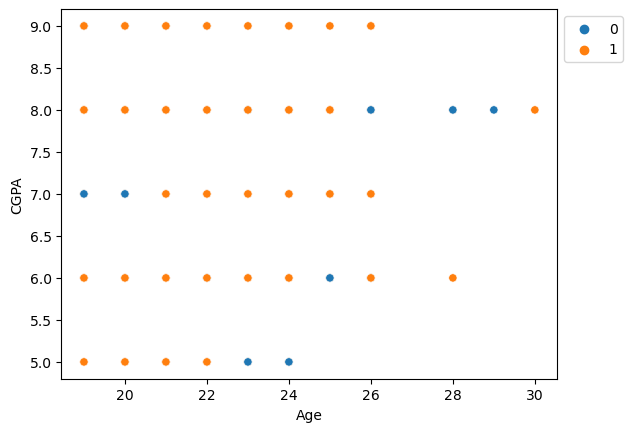

In [22]:
import seaborn as sns
sns.scatterplot(x = 'Age', y = 'CGPA', hue= 'Gender_Male', data = encD) 
plt.legend(bbox_to_anchor = (1,1), loc = 2) 
plt.show( ) 
